In [74]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('/workspaces/MBTI-Personality-Test/Data/mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


(array([1470.,  685., 1304., 1091.,  231.,  190., 1832.,  675.,  271.,
         337.,  166.,  205.,   89.,   48.,   39.,   42.]),
 array([ 0.    ,  0.9375,  1.875 ,  2.8125,  3.75  ,  4.6875,  5.625 ,
         6.5625,  7.5   ,  8.4375,  9.375 , 10.3125, 11.25  , 12.1875,
        13.125 , 14.0625, 15.    ]),
 <BarContainer object of 16 artists>)

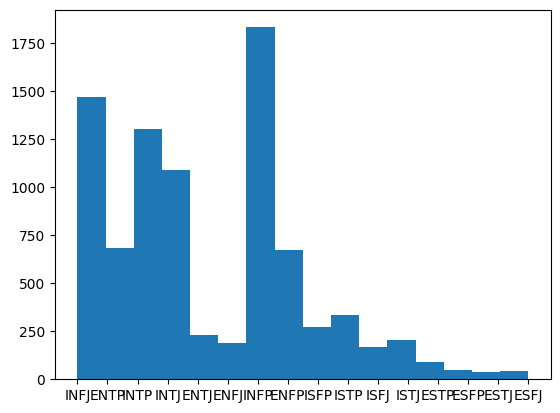

In [76]:
plt.hist(df['type'], bins=16)

In [77]:
#write a regular expression that extract the urls from the posts, end with ||| or space
import re
test = df['posts'][0]
test


"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [78]:
# remove urls in the text
def remove_url(dataframe, col):
    return dataframe[col].str.replace(r'(http|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])', "", regex=True)

# replace ||| with [SEP] so that bert can recognize the end of a sentence
def replace_sep(dataframe):
    return dataframe.str.replace(r'|||', r"[SEP]", regex=False).str.replace(r"'", "", regex=False)

# split the line according to [SEP]
def split_line(dataframe):
    return dataframe.str.split(r'\[SEP\]', expand=True).stack().reset_index(level=1, drop=True).rename('posts')

# strip the spaces
def remove_empty(dataframe):
    return dataframe.str.replace(r'\s+', ' ', regex=True).str.strip().dropna()

# remove the empty rows
def remove_empty_row(dataframe):
    return dataframe[dataframe != '']

df_tmp = (df.pipe(remove_url, 'posts').pipe(replace_sep).pipe(split_line).pipe(remove_empty).pipe(remove_empty_row))





In [80]:
df_new = df.drop(['posts'], axis=1).join(df_tmp).reset_index().drop(['index'], axis=1)

In [85]:
df_new.head()

,type,posts
0,INFJ,enfp and intj moments sportscenter not top ten...
1,INFJ,What has been the most life-changing experienc...
2,INFJ,On repeat for most of today.
3,INFJ,May the PerC Experience immerse you.
4,INFJ,The last thing my INFJ friend posted on his fa...


(array([1.7040e+03, 4.4810e+03, 1.5720e+03, 3.2320e+03, 3.6930e+03,
        2.5850e+03, 3.9220e+03, 2.8620e+03, 4.1920e+03, 4.1900e+03,
        2.7510e+03, 4.1720e+03, 4.3150e+03, 2.7640e+03, 4.0990e+03,
        2.7140e+03, 3.9400e+03, 3.9150e+03, 2.5460e+03, 3.7730e+03,
        3.6790e+03, 2.5130e+03, 3.5410e+03, 2.4370e+03, 3.5460e+03,
        3.4820e+03, 2.3030e+03, 3.4310e+03, 2.1620e+03, 3.2430e+03,
        3.1820e+03, 2.1560e+03, 3.1410e+03, 3.0090e+03, 2.0550e+03,
        3.0920e+03, 1.8830e+03, 3.0640e+03, 2.9300e+03, 1.8930e+03,
        2.8630e+03, 2.7800e+03, 1.8680e+03, 2.6350e+03, 1.8130e+03,
        2.6090e+03, 2.5770e+03, 1.7120e+03, 2.4070e+03, 1.6560e+03,
        2.4130e+03, 2.4640e+03, 1.5770e+03, 2.3350e+03, 2.3230e+03,
        1.6310e+03, 2.3170e+03, 1.5360e+03, 2.1900e+03, 2.1090e+03,
        1.3970e+03, 2.0570e+03, 2.0160e+03, 1.3930e+03, 1.9750e+03,
        1.3410e+03, 2.0110e+03, 2.2790e+03, 1.7490e+03, 3.9170e+03,
        7.5680e+03, 9.6850e+03, 2.8153e+04, 3.14

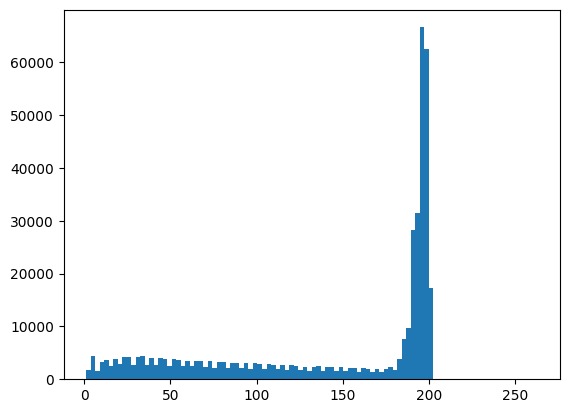

In [84]:
length = df_new['posts'].str.len()
plt.hist(length, bins=100)

In [86]:
df_new.type.unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [87]:
type2num = {'ISTJ': 0, 'ISFJ': 1, 'INFJ': 2, 'INTJ': 3, 'ISTP': 4, 'ISFP': 5, 'INFP': 6, 'INTP': 7, 'ESTP': 8, 'ESFP': 9, 'ENFP': 10, 'ENTP': 11, 'ESTJ': 12, 'ESFJ': 13, 'ENFJ': 14, 'ENTJ': 15}
num2type = {0: 'ISTJ', 1: 'ISFJ', 2: 'INFJ', 3: 'INTJ', 4: 'ISTP', 5: 'ISFP', 6: 'INFP', 7: 'INTP', 8: 'ESTP', 9: 'ESFP', 10: 'ENFP', 11: 'ENTP', 12: 'ESTJ', 13: 'ESFJ', 14: 'ENFJ', 15: 'ENTJ'}